# Pre-processing nextnano3D data and loading potentials tutorial

This tutorial will show you how to use the potential module to pre-process simulation data from nextnano3D. Specifically take a 3D potnetial lanscape and process the data format to produce 2D slices at a user specified z-coodinate for various control voltages used during the simulation runs. Next the tutorial will show how to the load pre-processed 2D potential files. Finally the tutorial creates a PotentialInterpolator object which allows us to find the potential landscape at arbitrary control voltage values.

Note: Make sure that the QuDiPy tutorial data from SharePoint or Teams is copied to the tutorials directory.

## 1. Load the relevant modules and process the NextNano 3D data

First the relavent modules are loaded.

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

import qudipy as qd
import qudipy.potential as pot

import numpy as np
import matplotlib.pyplot as plt

# 

In [2]:
# Define the source directory for the nextnano3D simulation data.
input_nextnano =    os.path.join(sys.path[0], 'QuDiPy tutorial data','Nextnano simulations')
# Define a directory location which will contain the pre-processed potential data for a given 2D slice. If this directory doesn't exist currently then it will be created.
output_preprocessed = os.path.join(sys.path[0], 'QuDiPy tutorial data','Pre-processed potentials','Pre-processed_data')

# Temporary: For Bohdan
input_nextnano = os.path.join(sys.path[0],'QuDiPy tutorial data','Nextnano simulations','1_dot_P_0p5_0p7')
output_preprocessed = os.path.join(sys.path[0],'QuDiPy tutorial data','Pre-processed potentials','Pre-processed_data')

print(input_nextnano)
print(output_preprocessed)

'''
Note the nextnano file structure:

    /simulation_runs
        /simulation_run_#_with_ctrl_names/values
            /output directory
                /data files

Data file types to be referenced/imported: .coord, .dat, .fld

Index the potetnial list as follows:

potential[#] -> returns a list containing [control values, potential data, coordinate data] for the simulation run #.
potential[#][0] -> returns the control values
potential[#][1] -> returns the potential data
potential[#][2] -> returns the coordinate data which is a tuple
'''

# Import all of the neccessary potential data and meta data for the simulation runs.
# Potetnial is a list data type containing nested list.
# Each element of the list contains [list of control valuess, list of potential data, 3-tuple of lists for x,y, and z cordinate data].
potential = pot.process_nextnano.import_folder(input_nextnano, option=True)

print(np.shape(potential))

print(potential)


c:\Users\zmeri\Documents\GitHub\QuDiPy-nextnano_conversion\tutorials\QuDiPy tutorial data\Nextnano simulations\1_dot_P_0p5_0p7
c:\Users\zmeri\Documents\GitHub\QuDiPy-nextnano_conversion\tutorials\QuDiPy tutorial data\Pre-processed potentials\Pre-processed_data
Importing .coord and .dat data files from \1_dot_P_0p5_0p7_t2_VP_0.5\output\bias_000_000_000:
Importing .coord and .dat data files from \1_dot_P_0p5_0p7_t2_VP_0.525\output\bias_000_000_000:
Importing .coord and .dat data files from \1_dot_P_0p5_0p7_t2_VP_0.55\output\bias_000_000_000:
Importing .coord and .dat data files from \1_dot_P_0p5_0p7_t2_VP_0.575\output\bias_000_000_000:
Importing .coord and .dat data files from \1_dot_P_0p5_0p7_t2_VP_0.6\output\bias_000_000_000:
Importing .coord and .dat data files from \1_dot_P_0p5_0p7_t2_VP_0.625\output\bias_000_000_000:
Importing .coord and .dat data files from \1_dot_P_0p5_0p7_t2_VP_0.65\output\bias_000_000_000:
Importing .coord and .dat data files from \1_dot_P_0p5_0p7_t2_VP_0.675\ou

In [3]:

# Enter the desired z coordinate to take a crossection of the x-y plane. The slice chosen must be a z-coordinate provdied from the NextNano 3D simulation.
# For example take a look at the z-cooranites range and select a desired value.
coord = potential[0][2]
z = coord[2][62]

# Now we define the field types we wish to write 2D slices for. Either potential or the electric field.
pot.process_nextnano.write_data(input_nextnano,output_preprocessed, slice=z, f_type=['potential','field'])

Converting 3D nextnano simulation data too 2D XY-plane potential along slice for z = 0.577831528707.
Converting 3D nextnano simulation data too 2D XY-plane field along slice for z = 0.577831528707.


(0,
 array([[ 0.00000000e+00, -5.00000000e+01, -4.40000000e+01, ...,
          4.00000000e+01,  4.40000000e+01,  5.00000000e+01],
        [-6.00000000e+01, -2.75587265e-03, -2.76783692e-03, ...,
         -2.78814740e-03, -2.76783692e-03, -2.75587265e-03],
        [-5.48252222e+01, -2.79606884e-03, -2.80905046e-03, ...,
         -2.83108889e-03, -2.80905046e-03, -2.79606884e-03],
        ...,
        [ 9.03836505e+01, -2.38955081e-03, -2.54523604e-03, ...,
         -2.76697951e-03, -2.54523604e-03, -2.38955081e-03],
        [ 9.50241724e+01, -2.41818160e-03, -2.57701386e-03, ...,
         -2.80305239e-03, -2.57701386e-03, -2.41818160e-03],
        [ 1.00000000e+02, -2.42858094e-03, -2.58853751e-03, ...,
         -2.81611287e-03, -2.58853751e-03, -2.42858094e-03]]))

## 2. Ensure the NextNano potential files were converted as desired

We need to specify the name of the folder that contains the potential files as well as the names for each potential file.

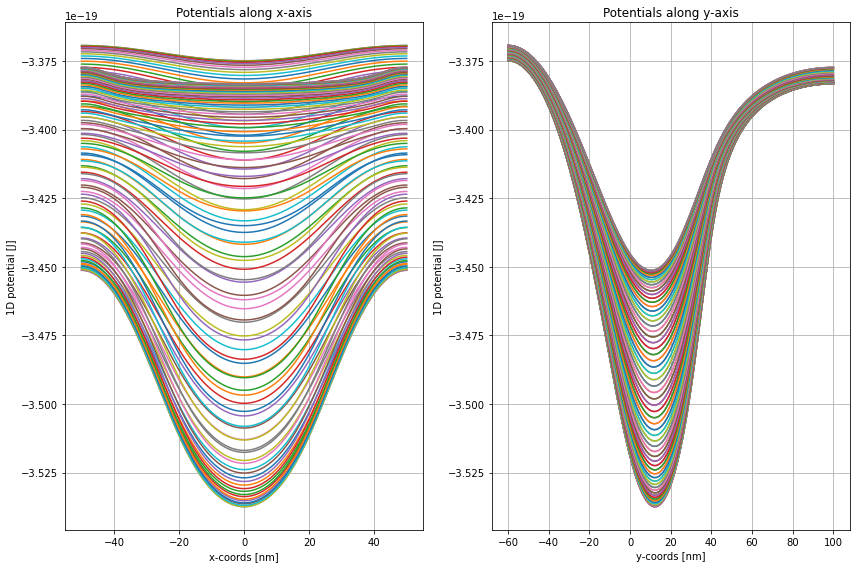

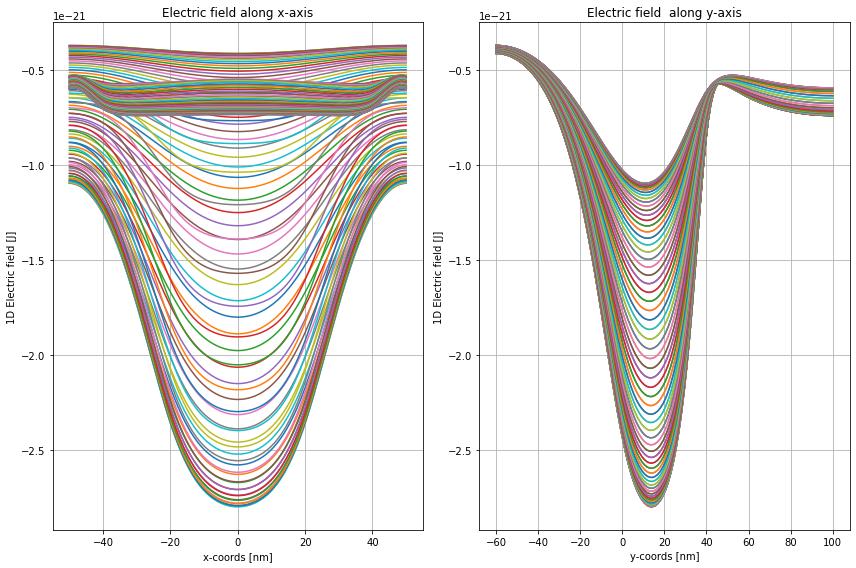

In [4]:
# Enter the name of the folder where the potential files are located. 
# If this argument is not supplied it will assume the current working directory.
pot_dir = output_preprocessed + '_for_slice_{:.3e}'.format(z) + '/'

# Specify the control voltage names (C#NAME as mentioned above)
ctrl_names = ['V1','V2','V3','V4','V5']

# Specify the control voltage values you wish to load.
# The cartesian product of all these supplied voltages will be loaded and MUST exist in the directory.
V1 = [0.1]
V2 = [0.2]
V3 = [0.2]
V4 = [0.2, 0.22, 0.24, 0.26]
V5 = [0.1]


ctrl_vals = [V1, V2, V3, V4, V5] 

# Temporary: For Bohdan
ctrl_names = ['VP']
VP = [0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.7]
ctrl_vals = [VP]   

# Or extract voltage values from the the imported nextnano data  
ctrl_vals = pot.process_nextnano.retrieve_ctrl_vals(potential)

# Now load the potentials for the newly created potential files  
# load_files returns a dictionary of all the information loaded
# f_type says we are loading potential files (other option is to load electric field files)
# f_dir specifies where the files are located
# f_dis_units specifies the distance units the files are in. The function will convert the units to [m].
# f_pot_units specifies the potential units the files are in. The function will convert the units to [J].
loaded_data = pot.load_potentials(ctrl_vals, ctrl_names,
                                  f_type='pot', f_dir=pot_dir,
                                  f_dis_units='nm', f_pot_units='eV')
# Additional keyword arguments are trim_x and trim_y which will trim the loaded potentials 
# to be only within the bounds specified by trim_x and trim_y

# We can check the fields of the dictionary returned to see what is stored.
loaded_data.keys()

# We can also go on to plot all of potential crossections along the x/y-planes for the choosen slice.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# potential along x-axis at y-axis slice
for i in range(np.shape(loaded_data['coords'][1])[0]):
    ax1.plot(loaded_data['coords'][0].T/1E-9,loaded_data['potentials'][0][i,:].T)
ax1.set(xlabel='x-coords [nm]', ylabel='1D potential [J]',
title=f'Potentials along x-axis')  
ax1.grid()  

# potential along y-axis at x-axis slice
for i in range(np.shape(loaded_data['coords'][0])[0]):
    ax2.plot(loaded_data['coords'][1]/1E-9,loaded_data['potentials'][0][:,i])
ax2.set(xlabel='y-coords [nm]', ylabel='1D potential [J]',
title=f'Potentials along y-axis')
ax2.grid()

fig.tight_layout()       
plt.show()

# Now load the Electric field for the newly created potential files  
loaded_data_field = pot.load_potentials(ctrl_vals, ctrl_names,
                                  f_type='electric', f_dir=pot_dir,
                                  f_dis_units='nm', f_pot_units='eV')

# We can check the fields of the dictionary returned to see what is stored.
loaded_data_field.keys()

# We can also go on to plot all of potential crossections along the x/y-planes for the choosen slice.
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# potential along x-axis at y-axis slice
for i in range(np.shape(loaded_data_field['coords'][1])[0]):
    ax1.plot(loaded_data_field['coords'][0].T/1E-9,loaded_data_field['electric'][0][i,:].T)
ax1.set(xlabel='x-coords [nm]', ylabel='1D Electric field [J]',
title=f'Electric field along x-axis')  
ax1.grid()  

# potential along y-axis at x-axis slice
for i in range(np.shape(loaded_data_field['coords'][0])[0]):
    ax2.plot(loaded_data_field['coords'][1]/1E-9,loaded_data_field['electric'][0][:,i])
ax2.set(xlabel='y-coords [nm]', ylabel='1D Electric field [J]',
title=f'Electric field  along y-axis')
ax2.grid()

fig.tight_layout()       
plt.show()